<a href="https://colab.research.google.com/github/viurdaneta/regression/blob/master/Predicted_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

In [0]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [0]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names=headers)

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
#Summarizing the dataset
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7775
freq,NaN,11,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [0]:
#Checking for missing values
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
missing_data = df.isnull()
missing_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
#Counting missing values
# for column in missing_data.columns.values.tolist():
#   print(column)
#   print(missing_data[column].value_counts())
#   print("\n")
print(missing_data.sum(), "\n")
print("Total missing values:",df.isnull().values.sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64 

Total missing values: 59


In [0]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
#Replacing the missing values with the median
median_normalized_losses = df["normalized-losses"].astype("int").median()
df["normalized-losses"].fillna(median_normalized_losses, inplace=True)

median_bore = df["bore"].astype("float").median()
df["bore"].fillna(median_bore, inplace=True)

median_stroke = df["stroke"].astype("float").median()
df["stroke"].fillna(median_stroke, inplace=True)

median_peakrpm = df["peak-rpm"].astype("float").median()
df["peak-rpm"].fillna(median_peakrpm, inplace=True)

median_horsepower = df["horsepower"].astype("float").median()
df["horsepower"].fillna(median_horsepower, inplace=True)

In [0]:
#Replacing the missing values with frequency
df["num-of-doors"].value_counts()
df["num-of-doors"].replace(np.nan, df["num-of-doors"].value_counts().idxmax(), inplace=True)
print("Total missing values:",df["num-of-doors"].isnull().values.sum())

Total missing values: 0


In [0]:
#Dropping the missing values in price
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print("Total missing values:",df["price"].isnull().values.sum())

Total missing values: 0


In [0]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
#bore, normalized losses, stroke, horsepower, peak rpm and price needs to be in a correct data type
df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,115,3.47,2.68,111,5000,13495
1,115,3.47,2.68,111,5000,16500
2,115,2.68,3.47,154,5000,16500
3,164,3.19,3.40,102,5500,13950
4,164,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...
196,95,3.78,3.15,114,5400,16845
197,95,3.78,3.15,160,5300,19045
198,95,3.58,2.87,134,5500,21485
199,95,3.01,3.40,106,4800,22470


In [0]:
#To float
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke","price", "peak-rpm"]].astype("float")
#To int
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["horsepower"]] = df[["horsepower"]].astype("int")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [0]:
#Now that the data is already formatted, im going to standardize it
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [0]:
#Normalizing data
df["length"] = df["length"] / df["length"].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["height", "width", "length"]]

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630
...,...,...,...
196,0.928094,0.956944,0.907256
197,0.928094,0.955556,0.907256
198,0.928094,0.956944,0.907256
199,0.928094,0.956944,0.907256


In [0]:
#Binning the horsepower
horsepower = df["horsepower"]
bins = np.linspace(min(horsepower), max(horsepower), 4)
group_names = ["low", "normal", "high"]

In [0]:
df['horsepower-binned'] = pd.cut(horsepower, bins, labels=group_names, include_lowest=True)
df["horsepower-binned"].value_counts()

low       153
normal     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'hp bins')

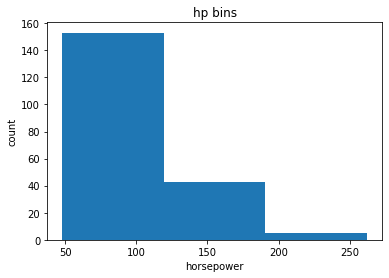

In [0]:
plt.hist(horsepower, bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("hp bins")

In [0]:
#Handling dummy variables
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,normal
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low


In [0]:
print(df["fuel-type"].value_counts(),"\n")
print(df["aspiration"].value_counts(),"\n")

In [0]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,115,alfa-romero,std,two,convertible,rwd,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,115,alfa-romero,std,two,convertible,rwd,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1
2,1,115,alfa-romero,std,two,hatchback,rwd,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,normal,0,1
3,2,164,audi,std,four,sedan,fwd,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1
4,2,164,audi,std,four,sedan,4wd,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1


In [0]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [0]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,115,alfa-romero,two,convertible,rwd,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,115,alfa-romero,two,convertible,rwd,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1
2,1,115,alfa-romero,two,hatchback,rwd,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,normal,0,1
3,2,164,audi,four,sedan,fwd,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1
4,2,164,audi,four,sedan,4wd,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1


In [0]:
df.to_csv('clean_car_data.csv')

Text(0, 0.5, 'price')

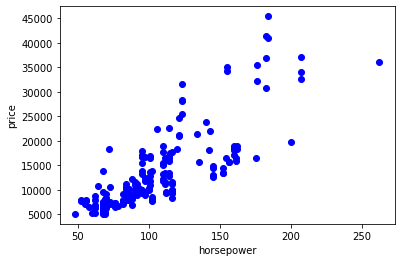

In [0]:
#Starting the model development
#Checking relationship
plt.scatter(df["horsepower"], df["price"], color="blue")
plt.xlabel("horsepower")
plt.ylabel("price")

Text(0, 0.5, 'price')

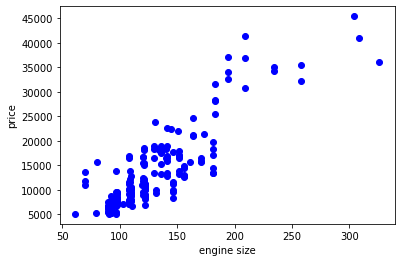

In [0]:
plt.scatter(df["engine-size"], df["price"], color="blue")
plt.xlabel("engine size")
plt.ylabel("price")

Text(0, 0.5, 'price')

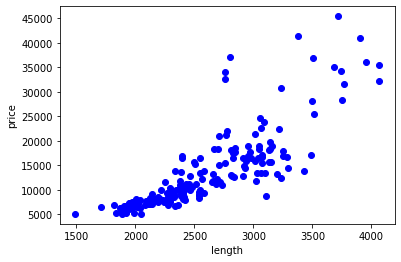

In [0]:
plt.scatter(df["curb-weight"], df["price"], color="blue")
plt.xlabel("length")
plt.ylabel("price")

In [0]:
#Splitting the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

In [0]:
#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(train[["horsepower", "engine-size", "length"]])
y = np.array(train[["price"]])
model.fit(x, y)
print("Coef is ", model.coef_)

Coef is  [[   53.47485575   108.12999112 22051.58766613]]


In [0]:
#Testing the model
x = np.array(test[["horsepower", "engine-size", "length"]])
y = np.array(test[["price"]])
pred_y = model.predict(x)

In [0]:
#Evaluating
from sklearn.metrics import r2_score
print("RMSE is %.2f" % r2_score(y, pred_y))

RMSE is 0.78
